# Imports

In [10]:
# Importing libraries for data handling, visualization, and deep learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob 
from skimage.io import imread
import cv2
from PIL import Image
from skimage.transform import resize
import itertools
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.models import save_model
import kagglehub

# Retreiving Data

In [4]:
# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\youss\.cache\kagglehub\datasets\msambare\fer2013\versions\1


# Constants

In [19]:
IMG_SIZE = 48
DATA_DIR = r'C:\Users\youss\Documents\delete later\emotion_recognition\emotion-detector-react\model\images'
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']

# Load the dataset
csv_path = r'C:\Users\youss\Documents\delete later\emotion_recognition\emotion-detector-react\model\emotions.csv'
emotions_df = pd.read_csv(csv_path)
emotions_df['set_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

# Collecting & preprocessing data

In [20]:
import os

def load_data():
    images = []
    labels = []
    
    for emotion_label, emotion in enumerate(EMOTIONS):
        # Get the directory for the current emotion
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(emotion_label)  # Assigning label based on index
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")
        
    return np.array(images), np.array(labels)

# Load the data
images, labels = load_data()

In [29]:
label_encoder = LabelEncoder()
emotions_df['gender'] = label_encoder.fit_transform(emotions_df['gender'])

images = images / 255.0

labels_categorical = to_categorical(labels, num_classes=len(EMOTIONS))

In [22]:
print("Distribution of emotions:")
print(pd.Series(labels).value_counts())

Distribution of emotions:
0    8
1    8
2    8
3    8
4    8
5    8
6    8
7    8
Name: count, dtype: int64


# Splitting the data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

In [31]:
# reshape data for the model
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Making and Training the model

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report

model = Sequential([
    # First Convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),

    # Second Convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Flatten and add Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout for regularization
    Dense(len(EMOTIONS), activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_test, y_test))

Epoch 1/30


c:\Users\youss\Documents\delete later\emotion_recognition\emotion-detector-react\model\emotion_recognition_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.0588 - loss: 2.0800 - val_accuracy: 0.0769 - val_loss: 2.0804
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1373 - loss: 2.0791 - val_accuracy: 0.0769 - val_loss: 2.0812
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0980 - loss: 2.0792 - val_accuracy: 0.0769 - val_loss: 2.0825
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1569 - loss: 2.0793 - val_accuracy: 0.0769 - val_loss: 2.0838
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1569 - loss: 2.0796 - val_accuracy: 0.0769 - val_loss: 2.0848
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.1765 - loss: 2.0778 - val_accuracy: 0.0769 - val_loss: 2.0860
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1176 - loss: 2.0773 - val_accuracy: 0.0769 - val_loss: 2.0877
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1765 - loss: 2.0789 - val_accuracy: 0.0769 - val_loss: 2.0900
Epoch 9/30

In [16]:
model = keras.models.load_model(r'C:\Users\youss\Documents\delete later\emotion_recognition\emotion-detector-react\model\emotion_detector_model2.keras')

# Testing Model

(48, 48)


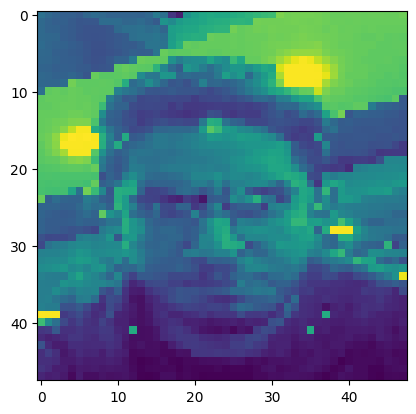

In [61]:
from keras.preprocessing import image

img = image.load_img(r"C:\Users\youss\Documents\delete later\emotion_recognition\emotion-detector-react\model\image.png",target_size = (48,48), color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) 

In [62]:
from tensorflow.keras.models import load_model

model = load_model(r"C:\Users\youss\Documents\delete later\emotion_recognition\emotion-detector-react\model\face_model.h5")
label_dict = {0:'Angry', 1:'Disgusted', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

img = np.expand_dims(img,axis = 0) 
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Angry


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


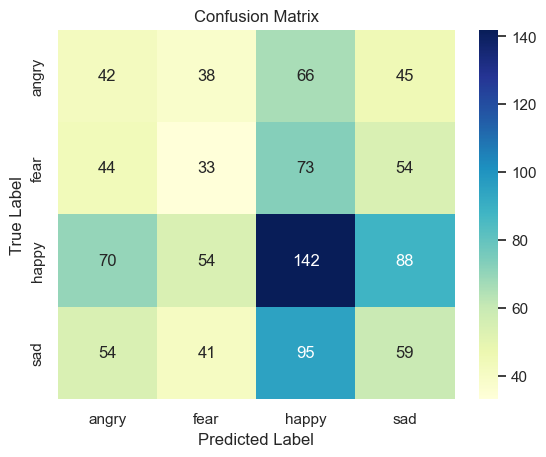

In [59]:
from sklearn.metrics import confusion_matrix

validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()